

#Task 1: Problem Understanding
## 1)Specify the problem
## 2)Business Requirement
## 3)Literature survey

## 4)Social impact

#Task 2:Data Understanding
## 1) Data Collection
## 2) Loading Data

#Task 3:EDA
## 1) Data Cleaning
## 2)Data Manipulation
## 3)Visualization

#Task 4:Model Building
#Task 5:Testing the Model
#Task 6: Deployment
#Task 7: doc




In [ ]:
# Data collection and preparation

# Data collection

In [ ]:

#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import pickle
%matplotlib inline
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')




In [ ]:
#checking for available styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
#Applying styles to notebook
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')



In [ ]:
# Reading csv data
df= pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test = pd.read_csv('/content/test_Y3wMUE5_7gLdaTN.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Data preparation
# Data preprocessing



In [ ]:
# Finding the shape of data

df.shape

(614, 13)

In [ ]:
test.shape

(367, 12)

In [ ]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<Axes: >

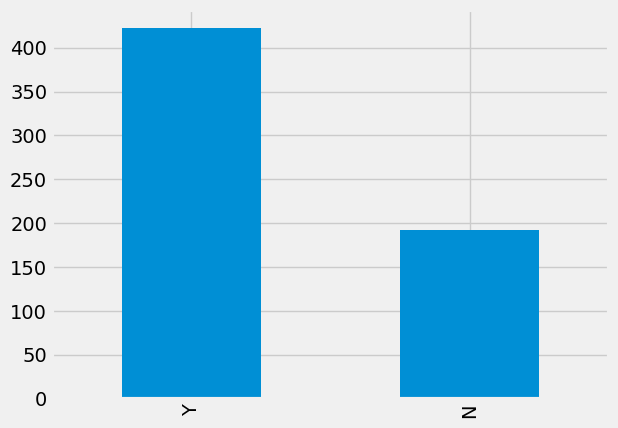

In [ ]:
df['Loan_Status'].value_counts(normalize=True)

df['Loan_Status'].value_counts().plot.bar()

In [ ]:
# Finding the null values

df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Finding outliers
sns.boxplot(df['Credit_History'])

In [ ]:
# Finding the count of outliers
#IQR = q3-q1..........,ub = q3+(1.5*IQR),lb = q1-(1.5*IQR)

#IQR = q3-q1

q1 =np.quantile(df['Credit_History'],0.25)
q3 =np.quantile(df['Credit_History'],0.75)

print('Q1 = {}'. format(q1))
print('Q3 = {}'. format(q3))

IQR = q3-q1

print('IQR value is {}'.format(IQR))

upperBound = q3+(1.5*IQR)
lowerBound = q3-(1.5*IQR)

print('The upper bound value is {} & the lower bound value is {}'.format(upperBound,lowerBound))

print('Skwed data :',len(df['Credit_History']>upperBound))

In [ ]:
len(df[df['Credit_History']>upperBound])

In [ ]:
# Handling outliers

from scipy import stats
plt.figure(figsize=(10,4))
plt.subplot(131)
sns.countplot(x= df['Credit_History'])
plt.subplot(132)
stats.probplot(np.log(y= df['Credit_History']), plot= Any)
plt.subplot(133)
sns.distplot(np.log(z= df['Credit_History']))


((array([-3.05421082e+00, -2.77754058e+00, -2.62234907e+00, -2.51249773e+00,
         -2.42654449e+00, -2.35548035e+00, -2.29463294e+00, -2.24125499e+00,
         -2.19358919e+00, -2.15044097e+00, -2.11096007e+00, -2.07451898e+00,
         -2.04064092e+00, -2.00895482e+00, -1.97916600e+00, -1.95103642e+00,
         -1.92437092e+00, -1.89900742e+00, -1.87480980e+00, -1.85166260e+00,
         -1.82946698e+00, -1.80813768e+00, -1.78760059e+00, -1.76779092e+00,
         -1.74865162e+00, -1.73013224e+00, -1.71218791e+00, -1.69477855e+00,
         -1.67786820e+00, -1.66142447e+00, -1.64541810e+00, -1.62982252e+00,
         -1.61461356e+00, -1.59976917e+00, -1.58526915e+00, -1.57109498e+00,
         -1.55722960e+00, -1.54365730e+00, -1.53036353e+00, -1.51733485e+00,
         -1.50455875e+00, -1.49202363e+00, -1.47971865e+00, -1.46763374e+00,
         -1.45575944e+00, -1.44408692e+00, -1.43260791e+00, -1.42131462e+00,
         -1.41019976e+00, -1.39925643e+00, -1.38847814e+00, -1.37785879e+00,

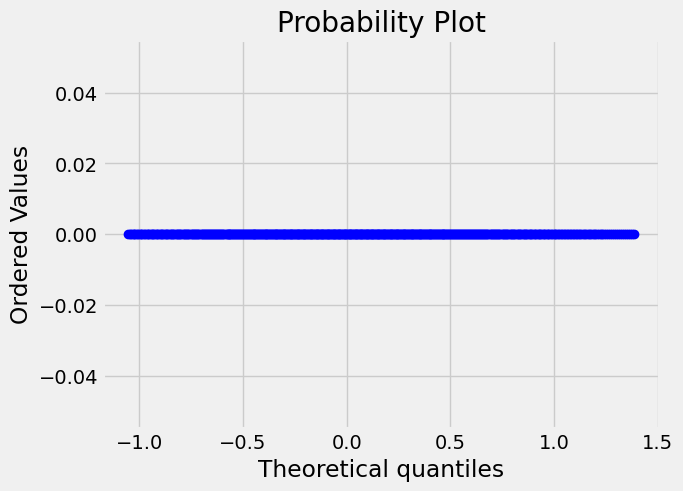

In [ ]:
stats.probplot(np.log(df['Credit_History']),plot=plt)

In [ ]:
# Transforming normal values to log values

In [ ]:
 df['Credit_History']= np.log(df['Credit_History'])

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,0.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,0.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,0.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,0.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,0.0,Urban,Y


In [ ]:
# Encoding  
# Encoding with list comp
df['Credit_History'] =[0 if x=='LOW' else i if x=='NORMAL' else 2 for x in df['Credit_History']]

In [ ]:
# Encoding with replace method

In [ ]:
df['Gender'] = df['Gender'].replace({'Female':0, 'Male':1})

In [ ]:
# Encoding with replace method

df['Education'] = df['Education'].replace({'Graduate':0, 'Not':1})

In [ ]:
df.head()

In [ ]:
# Spliting dependent & Independent variables


In [ ]:
x = df.drop('Loan_Status',axis=1)
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,0.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,0.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,0.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,0.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,0.0,Urban


In [ ]:
y= df['Loan_Status']
y

In [ ]:
# Checking columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# Rename columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0,0,No,5849,0.0,NaN,360.0,2,Urban,Y
1,LP001003,1.0,Yes,1,0,No,4583,1508.0,128.0,360.0,2,Rural,N
2,LP001005,1.0,Yes,0,0,Yes,3000,0.0,66.0,360.0,2,Urban,Y
3,LP001006,1.0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,2,Urban,Y
4,LP001008,1.0,No,0,0,No,6000,0.0,141.0,360.0,2,Urban,Y


In [ ]:
# Handling missing values

In [ ]:
#checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [ ]:
df['Credit_History'].unique()

array([2])

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.isnull().sum()*100 /len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       0.000000
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [ ]:
df['Credit_History'].mode([0])

0    2.0
Name: Credit_History, dtype: float64

In [ ]:
df['Credit_History']= df['Credit_History'].fillna(df['Credit_History']).mode([0])

In [ ]:
df['Self_Employed'].mode()[0]

'No'

In [ ]:
df['Credit_History'].unique()

array([2])

In [ ]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
df.isnull().sum()*100 / len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       0.000000
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [ ]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#handling categorical columns

df.sample(5)

In [ ]:
df['Dependents'].replace(to_replace ="3+",value='4')

In [ ]:
df['Dependents'].unique()

In [ ]:
df['Gender'].unique()

In [ ]:
df['Education'].unique()

array([0, 'Not Graduate'], dtype=object)

In [ ]:
#Handling imbalance Data
x=df.drop(columns=['Married'])
y=df.Married
print(x.shape,y.shape)

(614, 12) (614,)


In [ ]:
"""
Types of Analysis
1) Univariate analysis
2) Bivariate analysis
3) Multivariate analysis
4)Descriptive analysis / statistics
"""



In [ ]:
#Describtive Statistical

df.describe()


,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,601.000000,614.000000,614.000000,592.000000,600.00000,1.0
mean,0.813644,5403.459283,1621.245798,146.412162,342.00000,2.0
std,0.389718,6109.041673,2926.248369,85.587325,65.12041,NaN
min,0.000000,150.000000,0.000000,9.000000,12.00000,2.0
25%,1.000000,2877.500000,0.000000,100.000000,360.00000,2.0
50%,1.000000,3812.500000,1188.500000,128.000000,360.00000,2.0
75%,1.000000,5795.000000,2297.250000,168.000000,360.00000,2.0
max,1.000000,81000.000000,41667.000000,700.000000,480.00000,2.0


<Axes: ylabel='Density'>

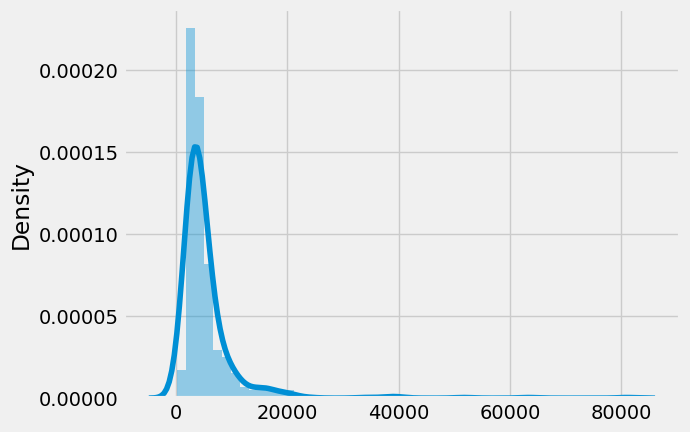

In [ ]:
#Visual analysis
#Univariate analysis -Extracting info from a single column

#checking data distribution

sns.distplot(x= df['ApplicantIncome'])





In [ ]:
sns.distplot(x= df(['Credit_History'])

In [ ]:
sns.countplot(x= df['Credit_History'])

In [ ]:
#Creating dummy dataframe for categorical values
df_cat=df.select_dtypes(include='object')
df_cat.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,No,0,0,No,Urban,Y
1,LP001003,Yes,1,0,No,Rural,N
2,LP001005,Yes,0,0,Yes,Urban,Y
3,LP001006,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,No,0,0,No,Urban,Y


In [ ]:
#visualizing counts in each variables

for i,j in enumerate(df_cat):
  plt.subplot(1,4,i+1)
  sns.distplot(df[j])

In [ ]:
for i,j in enumerate(df_cat):
     print(j)
     print(i)
                  

Loan_ID
0
Married
1
Dependents
2
Education
3
Self_Employed
4
Property_Area
5
Loan_Status
6


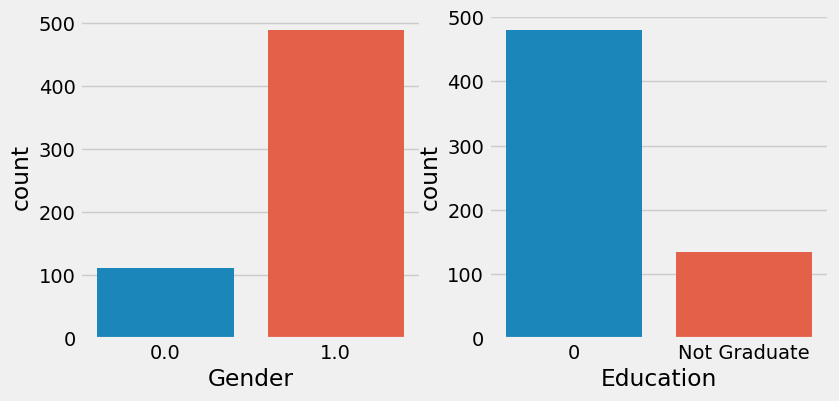

In [ ]:


#Bivariate analysis
# plotting the count plot
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(x=df['Gender'])
plt.subplot(1,4,2)
sns.countplot(x=df['Education'])
plt.show()

<Axes: xlabel='Married', ylabel='count'>

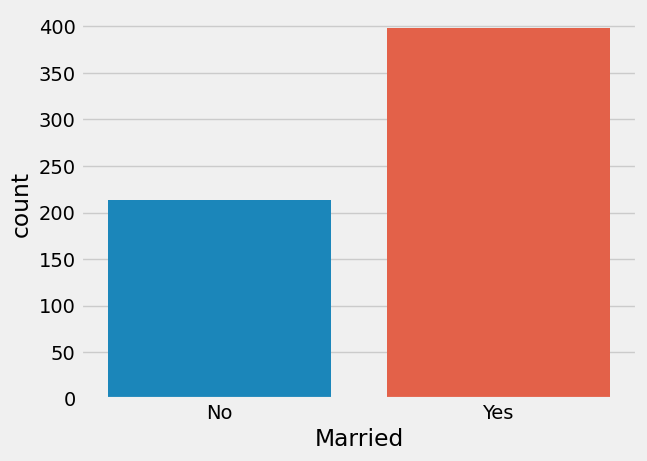

In [ ]:
sns.countplot(x= df['Married'])

<Axes: xlabel='Self_Employed', ylabel='count'>

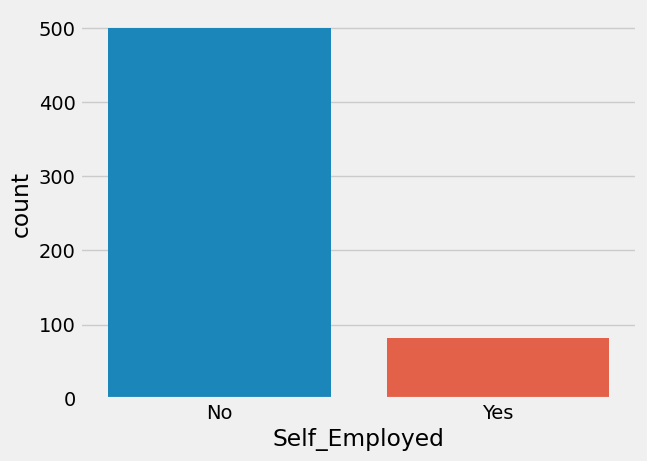

In [ ]:
sns.countplot(x= df['Self_Employed'])

In [ ]:
sns.countplot(x= df['Property_area'])

<Axes: xlabel='Gender'>

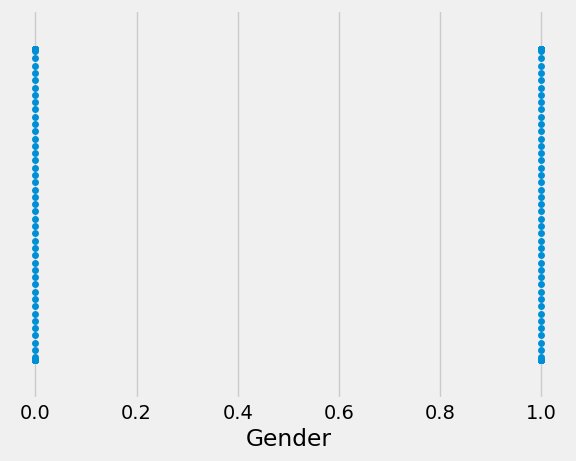

In [ ]:

#Multivariate analysis -Extrct info from more than 2 columns
sns.swarmplot(x= df['Gender'])


              

In [ ]:
 sns.swarmplot(x= df['Applicant_Income'])

KeyError: ignored

<Axes: xlabel='Loan_Status'>

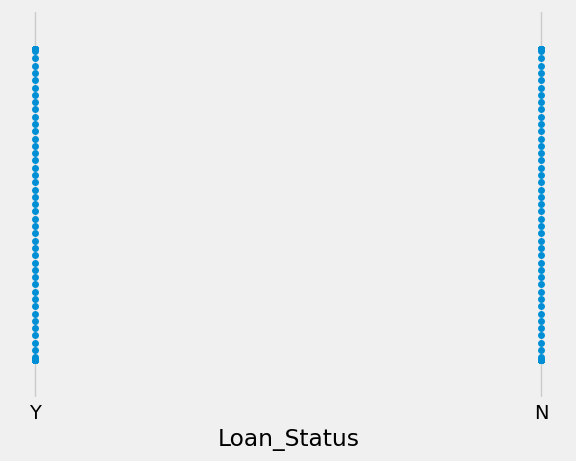

In [ ]:
sns.swarmplot(x= df['Loan_Status'])

<Axes: xlabel='Credit_History'>

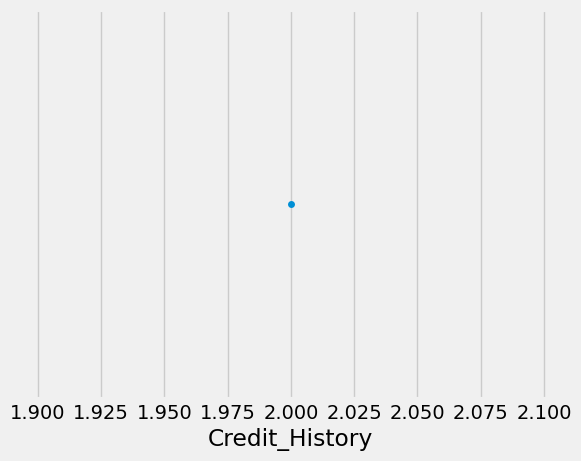

In [ ]:
sns.swarmplot(x= df['Credit_History'])

In [ ]:
# Finding correlation
f,ax= plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,fmt=".2f",ax=ax,linewidth=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


In [ ]:
sns.counntplot(x= df['class'])

In [ ]:
# Descriptive analysis-describtive stat
df.describe(include='all')

In [ ]:
df.describe()

,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,601.000000,614.000000,614.000000,592.000000,600.00000,1.0
mean,0.813644,5403.459283,1621.245798,146.412162,342.00000,2.0
std,0.389718,6109.041673,2926.248369,85.587325,65.12041,NaN
min,0.000000,150.000000,0.000000,9.000000,12.00000,2.0
25%,1.000000,2877.500000,0.000000,100.000000,360.00000,2.0
50%,1.000000,3812.500000,1188.500000,128.000000,360.00000,2.0
75%,1.000000,5795.000000,2297.250000,168.000000,360.00000,2.0
max,1.000000,81000.000000,41667.000000,700.000000,480.00000,2.0


In [ ]:
df.max()

Loan_ID              LP002990
Gender                    1.0
ApplicantIncome         81000
CoapplicantIncome     41667.0
LoanAmount              700.0
Loan_Amount_Term        480.0
Credit_History            2.0
Property_Area           Urban
Loan_Status                 Y
dtype: object

In [ ]:
df.mean()

Gender                  0.813644
ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
Credit_History          2.000000
dtype: float64

In [ ]:
df.min()

Loan_ID              LP001002
Gender                    0.0
ApplicantIncome           150
CoapplicantIncome         0.0
LoanAmount                9.0
Loan_Amount_Term         12.0
Credit_History            2.0
Property_Area           Rural
Loan_Status                 N
dtype: object

In [ ]:
df.std()

Gender                  0.389718
ApplicantIncome      6109.041673
CoapplicantIncome    2926.248369
LoanAmount             85.587325
Loan_Amount_Term       65.120410
Credit_History               NaN
dtype: float64

In [ ]:
pd.DataFrame(x).fillna(0)

,Loan_ID,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0,0,No,5849,0.0,0.0,360.0,2.0,Urban,Y
1,LP001003,1.0,1,0,No,4583,1508.0,128.0,360.0,0.0,Rural,N
2,LP001005,1.0,0,0,Yes,3000,0.0,66.0,360.0,0.0,Urban,Y
3,LP001006,1.0,0,Not Graduate,No,2583,2358.0,120.0,360.0,0.0,Urban,Y
4,LP001008,1.0,0,0,No,6000,0.0,141.0,360.0,0.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0,0,No,2900,0.0,71.0,360.0,0.0,Rural,Y
610,LP002979,1.0,3+,0,No,4106,0.0,40.0,180.0,0.0,Rural,Y
611,LP002983,1.0,1,0,No,8072,240.0,253.0,360.0,0.0,Urban,Y
612,LP002984,1.0,2,0,No,7583,0.0,187.0,360.0,0.0,Urban,Y


In [ ]:
np.nan_to_num(x)

array([['LP001002', 1.0, '0', ..., 2.0, 'Urban', 'Y'],
       ['LP001003', 1.0, '1', ..., nan, 'Rural', 'N'],
       ['LP001005', 1.0, '0', ..., nan, 'Urban', 'Y'],
       ...,
       ['LP002983', 1.0, '1', ..., nan, 'Urban', 'Y'],
       ['LP002984', 1.0, '2', ..., nan, 'Urban', 'Y'],
       ['LP002990', 0.0, '0', ..., nan, 'Semiurban', 'N']], dtype=object)

In [ ]:
# scaling the data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0,0,No,5849,0.0,NaN,360.0,2.0,Urban,Y
1,LP001003,1.0,Yes,1,0,No,4583,1508.0,128.0,360.0,NaN,Rural,N
2,LP001005,1.0,Yes,0,0,Yes,3000,0.0,66.0,360.0,NaN,Urban,Y
3,LP001006,1.0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,NaN,Urban,Y
4,LP001008,1.0,No,0,0,No,6000,0.0,141.0,360.0,NaN,Urban,Y


In [ ]:
# Independent variables
x =df.iloc[:,0:1]
x.head()

In [ ]:
# Dependent variable
y = df.iloc[:,1:]
y.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,No,0,0,No,5849,0.0,NaN,360.0,2.0,Urban,Y
1,1.0,Yes,1,0,No,4583,1508.0,128.0,360.0,NaN,Rural,N
2,1.0,Yes,0,0,Yes,3000,0.0,66.0,360.0,NaN,Urban,Y
3,1.0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,NaN,Urban,Y
4,1.0,No,0,0,No,6000,0.0,141.0,360.0,NaN,Urban,Y


In [ ]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_bal= sc.fit_transform(x)



In [ ]:
# Split training & testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
# Module building

from sklearn.linear_model import LinearRegression

In [ ]:

def DecisionTree(x_train, x_test, y_train, y_test):
    dt=DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    y_Pred = dt.predict(x_test)
    print('***DecisionTreeClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,y_Pred))
    print('Classification report')
    print(classification_report(y_test,y_Pred))

In [ ]:
# Random forest model

def decisionTree(x_train, x_test, y_train, y_test):
  rf= DecisionTreeClassifier()
  rf.fit(x_train, y_train)
  yPred = df.predict(x_test)
  print('***DecisiontreeClassifier***')
  print('Confusion matrix')
  print(confusion_matrix(y_test,y_Pred))
  print('Classification report')
  print(classification_report(y_test,y_Pred))


In [ ]:
# KNN model


In [ ]:
def KNN(x_train, x_test, y_train, y_test):
  Knn = KNeighborsClassifier()
  Knn.fit(x_train, y_train)
  yPred = Knn.predict(x_test)
  print('***KNeighborsClassifier***')
  print('Confusion matrix')
  print(confusion_matrix(y_test, yPred))
  print('Classification report')
  print(classification_report(y_test, yPred))

In [ ]:
# Xgboost moedel
def xgboost(x_train, x_test, y_train, y_test):
  xg = GradientBoostingClassifier()
  xg.fit(x_train, y_train)
  yPred = xg.predict(x_test)
  print('***GradientBoostingClassifier***')
  print('Confusion matrix')
  print(confusion_matrix(y_test, yPred))
  print('Classification report')
  print(classification_report(y_test, yPred))

In [ ]:
#ANN model
#Importing the keras libraries and packages
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Initialising the ANN
classifier=Sequential()


In [ ]:
# Additing the input layer and the first hidden layer
classifier.add(Dense (units=100, activation= 'relu',input_dim= 11))

In [ ]:
#Adding the second hidden layer
classifier.add(Dense(units=50, activation='relu'))

In [ ]:
#Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
 #.Fitting.the.ANN.to.the.Training.set
model_history= classifier.fit(x_train, y_train, batch_size=100, validation_split= 0.2,epochs= 100)

In [ ]:

# Gender Married Dependents Education Self_Employed ApplicantIncome CoapplicantIncome LoanAmount Loan_Amount_Term Credit_History Property_Area

dtr.predict([[1,1,0,1,1,4276,1542,145,240,0,1]])

In [ ]:
#Gender Married Dependents Education Self_Employe ApplicantIncome CoapplicantIncome LoanAmount Loan_Amount_Term Credit_History Properly_Area
rfr.predict([[1,1,0,1,1,4276,1542,145,240,0,1]])

In [ ]:
KNeighbors.predictions([[1,1,0,1,1,4276,1542,145,240,0,1]])

In [ ]:
xgb.predict([[1,1,0,1,1,4276,1542,145,240,0,1]])

In [ ]:
classifier.save("loan.h5")


In [ ]:
y_pred = classifier.predict(x_test)
y_pred
y_pred = (y_pred> 0.5)
y_pred

In [ ]:
def predict_exit(sample_value):
  sample_value=np.array(sample_value)
  sample_value=sample_value.reshape(1,-1)
  sample_value=sc.transform(sample_value)
  return classifier.predict(sample_value)

In [ ]:
sample_value= [[1,1,0,1,1,4276,1542,145,240,0,1]]
if predict_exit(sample_value)>0.5:
  print('prediction: High chance of Loan Approval!')
else:
  print('prediction: Low chance of Loan Approval.')

In [ ]:
# performence Testing & Hyperparameter Tunning


In [ ]:
def CompareModel(x_tarin,x_test,y_train,y_test):
  decisionTree(x_train,x_test,y_train,y_test)
  print('-'*100)
  RandomForest(x_train,x_test,y_train,y_test)
  print('-'*100)
  XGB(x_train,x_test,y_train,y_test)
  print('-'*100)
  KNN(x_train,x_test,y_train,y_test)
  print('-'*100)
  



In [ ]:
y_Pred = classifier.predict(x_test)
print(accuracy_score(y_pred,y_test))
print("ANN Model")
print("Confusion_Matrix")
print(confusion_Matrix(y_test,y_pred))
print("Classification Report")
print(classification_report(y_test,y_pred))

